# Declaration of Originality

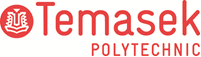

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :   Low Feng Hao, Esmond
* Tutorial Group                :   TC07
* Tutor						    :   Ms Esther Goh
* Submission Date               :   11 February 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [2]:
## Import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# 1. Business Understanding
#### Context:
**The COVID-19 pandemic has placed an unprecedented strain on health systems, with rapidly increasing demand for healthcare in hospitals and intensive care units (ICUs) worldwide. As the pandemic escalates, determining the resulting needs for healthcare resources (beds, staff, equipment) has become a key priority for many countries. Projecting future demand requires estimates of how long patients with COVID-19 need different levels of hospital care.**
**While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.**
**The problem is to manage the functioning of Hospitals in a professional and optimal manner.**

#### Goal:
**To predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.**

Source: https://www.kaggle.com/datasets/arashnic/covid19-hospital-treatment/data


# 2. Data Understanding

## 2.1 Load dataset

In [3]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'hospital.csv'
df = pd.read_csv(FILE_PATH)
df

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,1,8,2,3,2,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,2,5,2,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,4,1,0,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,1,2,1,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,1,2,1,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,0,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,0,1,0,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,0,4,0,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,1,2,1,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


Based on the data given here and from the business understanding, Stay_Days is the target we are trying to predict, while the rest of the columns are just the features. Additionally, what I can tell is that there are indeed some unnecessary data I can already pinpoint (such as unnecessary ids), which I can remove later. Furthermore, I notice that hospital, hospital_type, hospital_city, and hospital_region have some numerical values which I believe is just the number that classifies each value in those columns

## 2.2 Summary Statistics

In [4]:
## Understand the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital                           318438 non-null  int64  
 2   Hospital_type                      318438 non-null  int64  
 3   Hospital_city                      318438 non-null  int64  
 4   Hospital_region                    318438 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility                      318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

Seeing that the data type for Hospital, Hospital_type, Hospital_city, Hospital_region are in int64, this shows that I was right that the numerical values are just numbers that classifies each value in those columns

In [5]:
## Check for missing data
df.isna().sum()

case_id                                 0
Hospital                                0
Hospital_type                           0
Hospital_city                           0
Hospital_region                         0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility                           0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Illness_Severity                        0
Patient_Visitors                        0
Age                                     0
Admission_Deposit                       0
Stay_Days                               0
dtype: int64

In [6]:
#Since got missing data for the bed grades and city codes, and it is not really a lot of rows that are missing, just drop all rows that has missing
df = df.dropna()

In [7]:
df.describe(include="all")
#provides the summary statistics of all columns

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
count,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793,313793,313793,313793.000000,313793.000000,313793.000000,313793,313793,313793.000000,313793,313793.000000,313793
unique,NaN,NaN,NaN,NaN,NaN,NaN,5,6,6,NaN,NaN,NaN,3,3,NaN,10,NaN,11
top,NaN,NaN,NaN,NaN,NaN,NaN,gynecology,R,F,NaN,NaN,NaN,Trauma,Moderate,NaN,31-40,NaN,21-30
freq,NaN,NaN,NaN,NaN,NaN,NaN,245850,126104,111006,NaN,NaN,NaN,150252,173425,NaN,62760,NaN,86316
mean,158937.911120,18.326419,1.257781,4.778169,0.780358,3.196419,NaN,NaN,NaN,2.622952,65743.029382,7.252447,NaN,NaN,3.280857,NaN,4881.893165,NaN
std,91939.506976,8.633613,1.535338,3.103237,0.752329,1.167924,NaN,NaN,NaN,0.872618,37978.083237,4.745243,NaN,NaN,1.761758,NaN,1086.243945,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,1800.000000,NaN
25%,79271.000000,11.000000,0.000000,2.000000,0.000000,2.000000,NaN,NaN,NaN,2.000000,32833.000000,4.000000,NaN,NaN,2.000000,NaN,4188.000000,NaN
50%,158950.000000,19.000000,1.000000,5.000000,1.000000,3.000000,NaN,NaN,NaN,3.000000,65735.000000,8.000000,NaN,NaN,3.000000,NaN,4742.000000,NaN
75%,238399.000000,26.000000,2.000000,7.000000,1.000000,4.000000,NaN,NaN,NaN,3.000000,98472.000000,8.000000,NaN,NaN,4.000000,NaN,5410.000000,NaN


In [8]:
#Getting the unique values of object columns just to see the values to ensure dataset matches the description from the source
col_categorical = df.select_dtypes(include=['object']).columns
for col in df[col_categorical]:
    print(f'{col} ({df[col].nunique()}): {df[col].unique()}')

Department (5): ['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
Ward_Type (6): ['R' 'S' 'Q' 'P' 'T' 'U']
Ward_Facility (6): ['F' 'E' 'D' 'B' 'A' 'C']
Type of Admission (3): ['Emergency' 'Trauma' 'Urgent']
Illness_Severity (3): ['Extreme' 'Moderate' 'Minor']
Age (10): ['51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' '11-20' '0-10'
 '91-100']
Stay_Days (11): ['0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80'
 'More than 100 Days' '81-90' '61-70' '91-100']


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

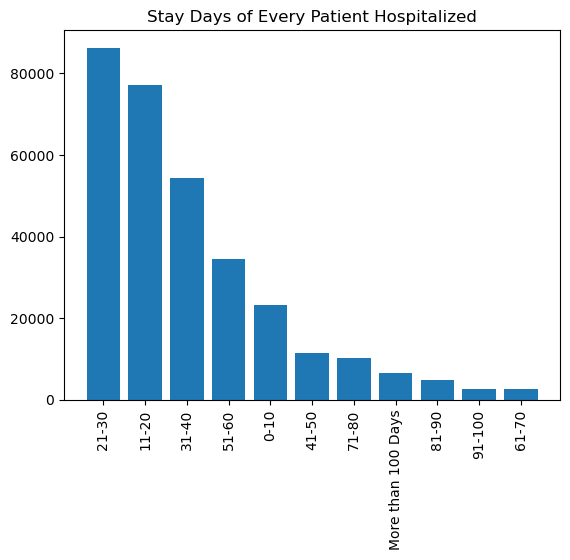

In [9]:
## Understanding distribution of target
target = df['Stay_Days']
get_target = target.value_counts() #get counts of each category of stay days to be displayed in the data
plt.xticks(rotation=90) #rotate labels for readability
plt.bar(get_target.index, get_target.values)
plt.title('Stay Days of Every Patient Hospitalized')
plt.show()

Based on the distribution of the target (number of stay days for each patient) by using a bar graph, we can see that most patients (with more than 80,000 + patients) have stayed for at least 21 to 30 days in a hopsital while there is only a small number of patients who have stayed for 91 to 100 and 61 to 70 days in the hospital.

### 2.3.1.2 Understanding distribution of features

In [10]:
# But before that lets remove any unnecessary columns, such as case_id, patientid, Patient_Visitors, Admission_Deposit, along with Stay_Days cause it is the target
# caseid + patientid are irrelevant because we dont need extra ids, number of patient visitors will not really affect the stay days of patients logically, and admission deposit only shows us the cost of the patient to be hospitalized, so it should not affect how long the patient stays
features = df.drop(['case_id', 'patientid', 'Patient_Visitors', 'Admission_Deposit', 'Stay_Days'], axis=1)
features
# I was kind of originally thinking about removing city_code_patient because it may be identical to the region
# However, the source did not really specify if the city_code is same as the region, so hence I would just leave it there for now

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Illness_Severity,Age
0,8,2,3,2,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,51-60
1,2,2,5,2,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,51-60
2,10,4,1,0,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,51-60
3,26,1,2,1,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,51-60
4,26,1,2,1,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,0,6,0,3,radiotherapy,Q,F,4.0,23.0,Emergency,Moderate,41-50
318434,24,0,1,0,2,anesthesia,Q,E,4.0,8.0,Urgent,Moderate,81-90
318435,7,0,4,0,3,gynecology,R,F,4.0,10.0,Emergency,Minor,71-80
318436,11,1,2,1,3,anesthesia,Q,D,3.0,8.0,Trauma,Minor,11-20


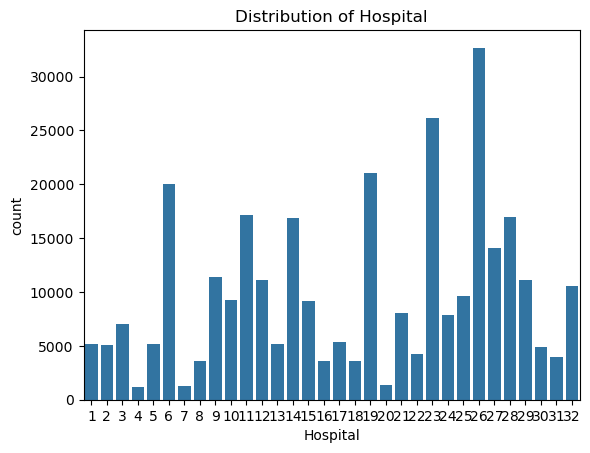

Hospital
1      5188
2      5050
3      7030
4      1216
5      5143
6     20016
7      1269
8      3611
9     11381
10     9271
11    17107
12    11149
13     5178
14    16917
15     9134
16     3631
17     5373
18     3592
19    21035
20     1390
21     8047
22     4237
23    26112
24     7835
25     9642
26    32681
27    14109
28    16947
29    11092
30     4917
31     3932
32    10561
dtype: int64


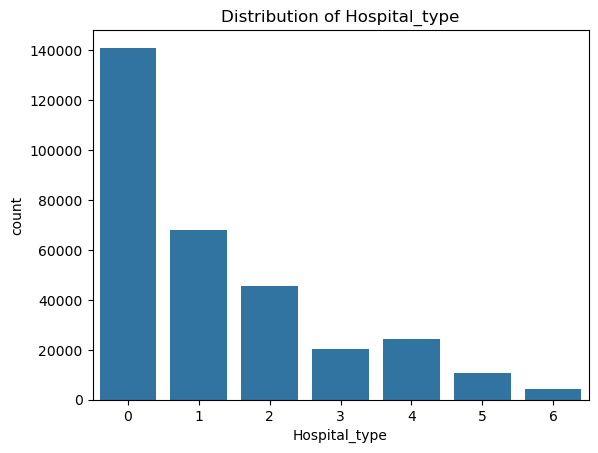

Hospital_type
0    141071
1     68125
2     45352
3     20161
4     24286
5     10561
6      4237
dtype: int64


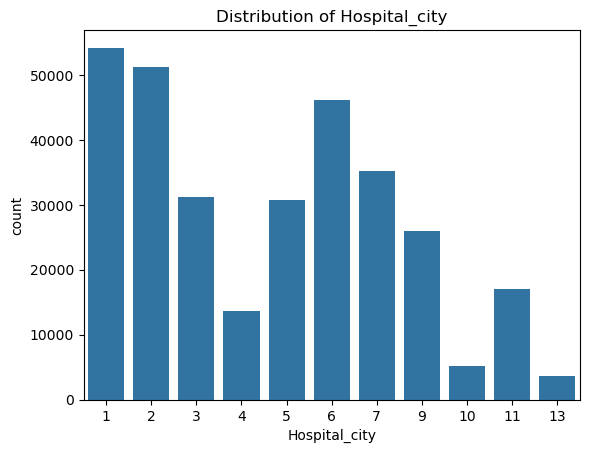

Hospital_city
1     54181
2     51178
3     31168
4     13577
5     30743
6     46128
7     35144
9     25947
10     5188
11    16947
13     3592
dtype: int64


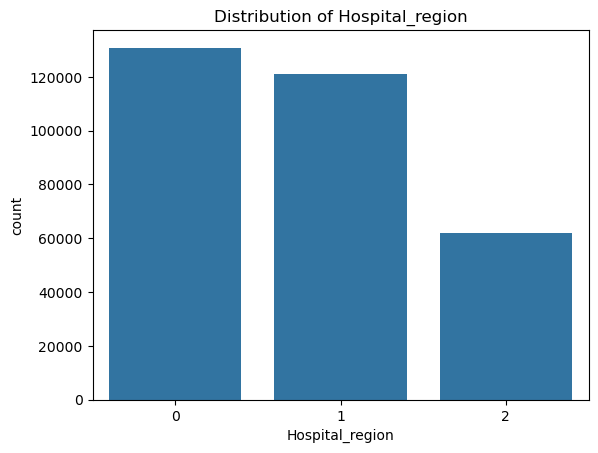

Hospital_region
0    130833
1    121049
2     61911
dtype: int64


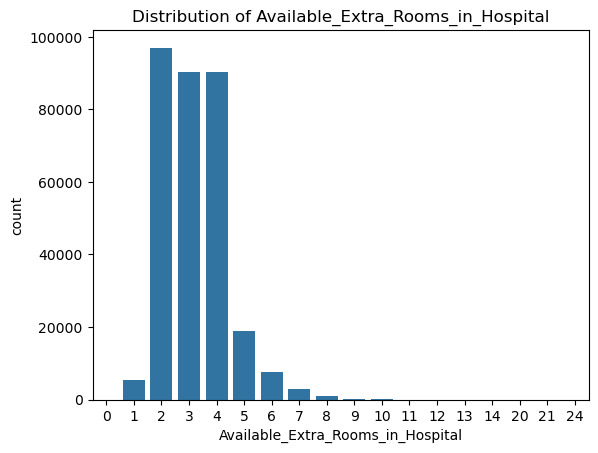

Available_Extra_Rooms_in_Hospital
0        15
1      5486
2     97017
3     90237
4     90279
5     18937
6      7649
7      2837
8      1017
9       217
10       63
11       17
12       13
13        2
14        1
20        2
21        3
24        1
dtype: int64


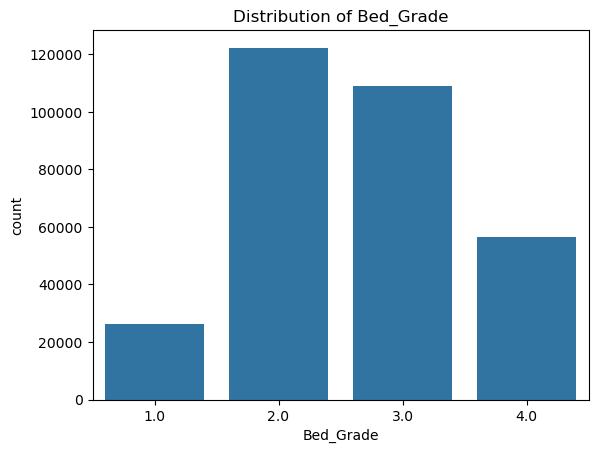

Bed_Grade
1.0     26212
2.0    122297
3.0    108878
4.0     56406
dtype: int64


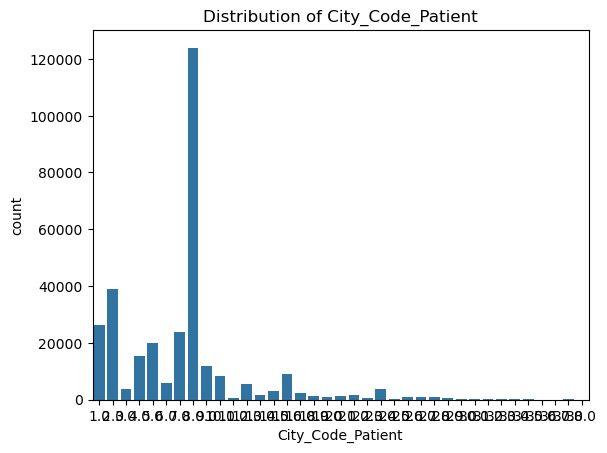

City_Code_Patient
1.0      26357
2.0      38835
3.0       3772
4.0      15379
5.0      20079
6.0       6005
7.0      23797
8.0     123977
9.0      11794
10.0      8172
11.0       658
12.0      5646
13.0      1625
14.0      2927
15.0      8943
16.0      2252
18.0      1404
19.0      1028
20.0      1409
21.0      1602
22.0       405
23.0      3697
24.0       360
25.0       798
26.0      1023
27.0       771
28.0       521
29.0        98
30.0       133
31.0        59
32.0        52
33.0        78
34.0        46
35.0        16
36.0        12
37.0        57
38.0         6
dtype: int64


In [11]:
#gets all the necessary data that is either an int64 or float64 to be displayed in a countplot, which counts the frequency of each unique value in a column and plot it in a bar
for col in features.select_dtypes(include=['int64', 'float64']).columns:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()
    print(features.groupby([col]).size())
#using groupby + size to verify the number of rows of each group because some countplots are not too clear (due to value being too small to be placed in countplots)
#why don't use histogram or boxplot? Because the numeric values for all of these variables/features are acting as an id/code of the variable (e.g. Hospital Region 1 could be Asia, Hospital Region 2 could be Eurpoe, and vice versa)
#which is why we used countplot because it counts how many times the id/code appears to be displayed as a bar

Based on the countplots that shows the distribution of features, we can say that most patients are admitted to **hospital 26 (with 30k+)**, while the hospital with the least patients admitted is **hospitals 4 (way less than 5k)**. The type of hospitals patients are in are mostly **type 0 (slightly more than 140k)**, while the least being **type 6 (way fewer than 20k)**. Additionally, **hospital city 1** has the most patients admitted in that city **(50k+)**, with hospital city 8 and 12 not having any appearance in the dataset at all in the countplot, hence **hospital city 13** has the least patient admissions **(less than 10k)**. **Hospital region 0 is the most populated (120k+)** while **hospital region 2** is the least populated with patients **(around 60k)**. To add on, **hospitals 14 and 24** both only have **1 available extra room** each (based on the groupby size), while **most hospitals (closing to 100k) have only 2 extra rooms**. Furthermore, most bed grades are labelled as **2 (slightly more than 120k)**, while the **least bed grade is 1 (more than 20k)**. Lastly, the city code of the patient is commonly **8 (with 120k+)** while the **least common is 38 (based on the groupby size)**.

Note: Some countplots are rather hard to find the least common values due to how big our dataset is, hence I need to use groupby size to pinpoint smaller occurences.

In [12]:
features = features.drop(['City_Code_Patient'], axis=1)
features
#after looking at the city_code_patient columns, I realized that is a lot of values I would have to one-hot encoding, which could affect memory cause my dataset quite large and it causes curse of dimensionality

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,Type of Admission,Illness_Severity,Age
0,8,2,3,2,3,radiotherapy,R,F,2.0,Emergency,Extreme,51-60
1,2,2,5,2,2,radiotherapy,S,F,2.0,Trauma,Extreme,51-60
2,10,4,1,0,2,anesthesia,S,E,2.0,Trauma,Extreme,51-60
3,26,1,2,1,2,radiotherapy,R,D,2.0,Trauma,Extreme,51-60
4,26,1,2,1,2,radiotherapy,S,D,2.0,Trauma,Extreme,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,0,6,0,3,radiotherapy,Q,F,4.0,Emergency,Moderate,41-50
318434,24,0,1,0,2,anesthesia,Q,E,4.0,Urgent,Moderate,81-90
318435,7,0,4,0,3,gynecology,R,F,4.0,Emergency,Minor,71-80
318436,11,1,2,1,3,anesthesia,Q,D,3.0,Trauma,Minor,11-20


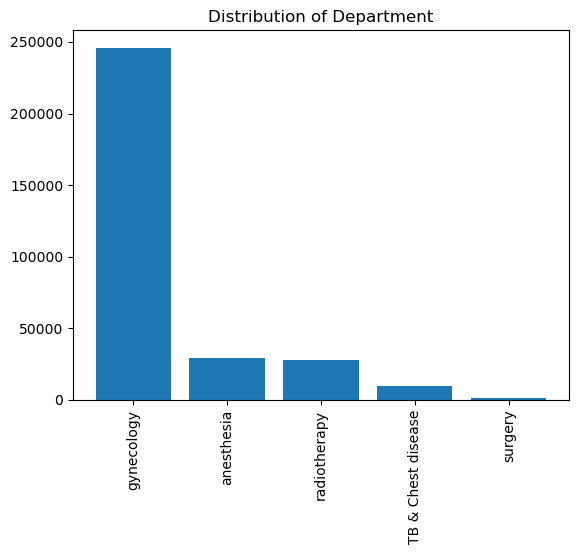

Department
TB & Chest disease      9460
anesthesia             29187
gynecology            245850
radiotherapy           28153
surgery                 1143
dtype: int64


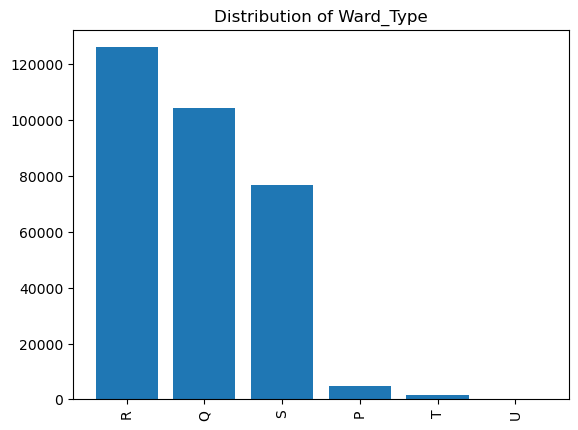

Ward_Type
P      4949
Q    104495
R    126104
S     76771
T      1465
U         9
dtype: int64


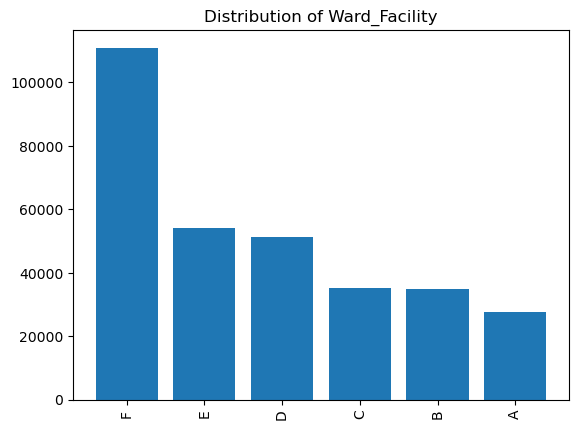

Ward_Facility
A     27557
B     34727
C     35144
D     51178
E     54181
F    111006
dtype: int64


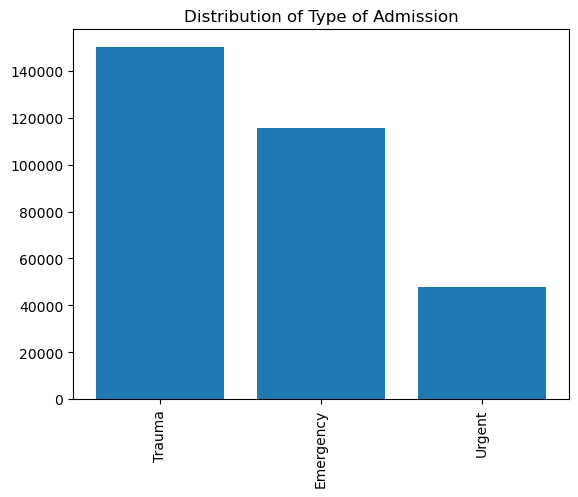

Type of Admission
Emergency    115564
Trauma       150252
Urgent        47977
dtype: int64


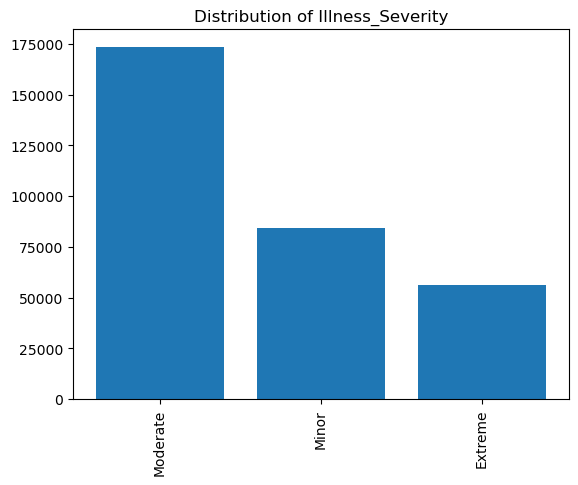

Illness_Severity
Extreme      56049
Minor        84319
Moderate    173425
dtype: int64


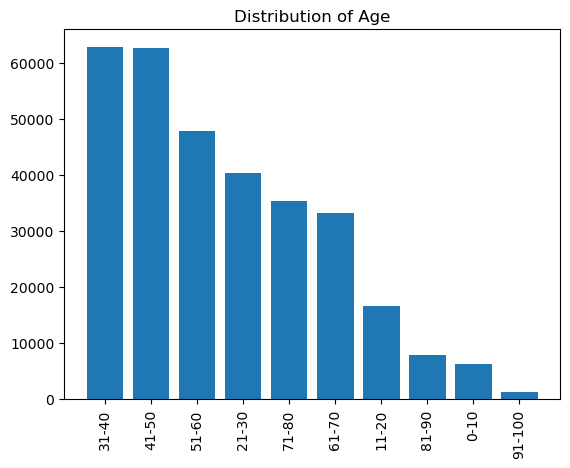

Age
0-10       6190
11-20     16537
21-30     40272
31-40     62760
41-50     62633
51-60     47766
61-70     33238
71-80     35354
81-90      7774
91-100     1269
dtype: int64


In [13]:
for col in features.select_dtypes(include=['object']).columns:
    cat_features = features[col]
    get_cat_f = cat_features.value_counts() #get occurences of each unique value in all categorical columns
    plt.xticks(rotation=90) #rotate labels for readability
    plt.bar(get_cat_f.index, get_cat_f.values)
    plt.title(f'Distribution of {col}')
    plt.show()
    #using groupby size to see smaller occurences such as Ward_Type U, surgery department
    print(features.groupby([col]).size())

- The distribution of departments from the bar graph shows that the gynecology department has most of its patients overseen by them (close to 250k), while surgery has the least number of patients under its department (roughly 1k+).
- Ward Type U has the least occurence for the ward type (9 only) while Ward Type R is the most common ward type for patients (120k+).
- Ward Facility F is the most common for patients (with 100k+), while Ward Facility A is the least common (close to 30k).
- The type of admission that is the highest is Trauma (more than 140k+), while Urgent admissions have the least at around 40k+.
- For Illness Severity, most patients admitted have moderate severity (at almost 175k), however only about roughly 50k+ patients have extreme severity.
- The distribution of age shows that most patients are aged 31-40 & 41-50 (both having a total of 62k+ patients respectively with that age), while patients aged 91-100 is the least common (less than 1k).

(Used data from the bar graph + groupby size)

### 2.3.2 Understanding relationship between variables

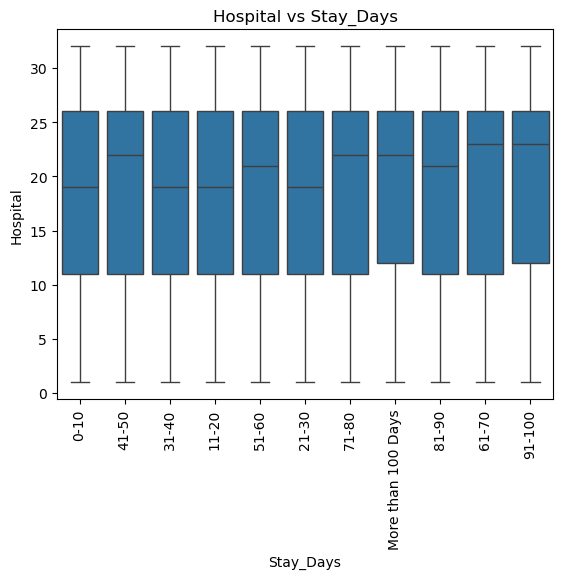

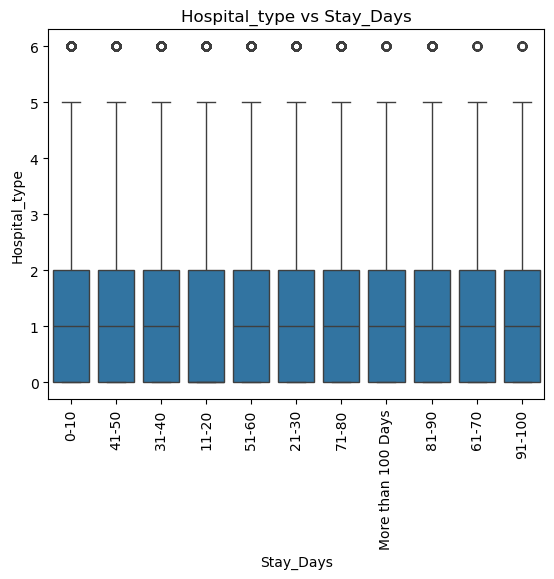

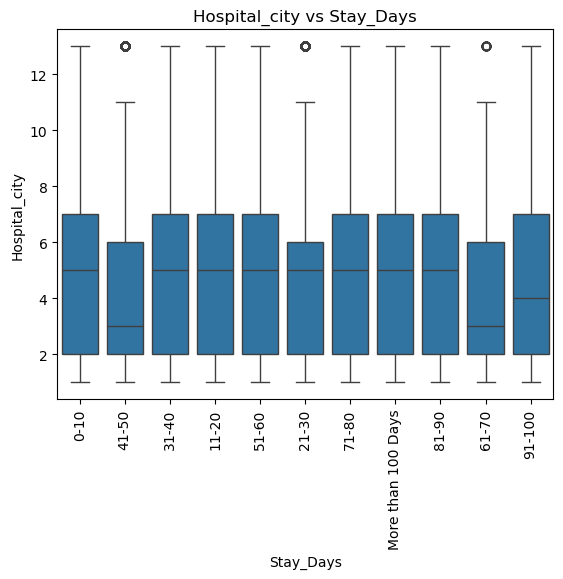

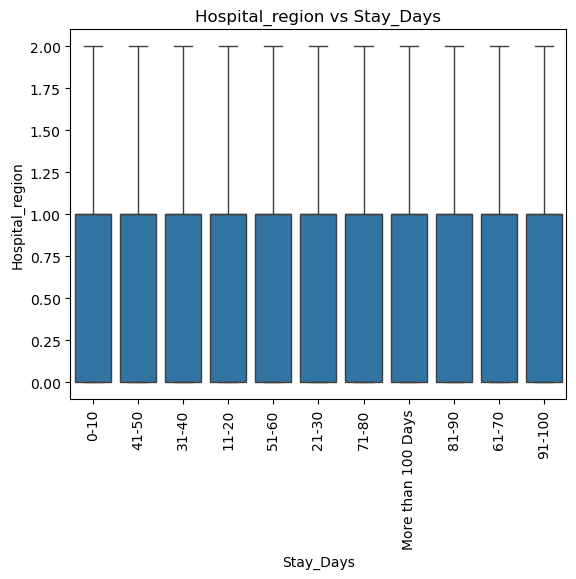

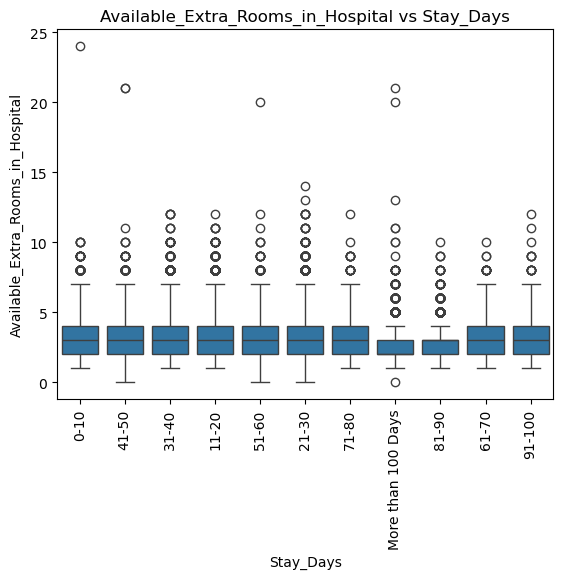

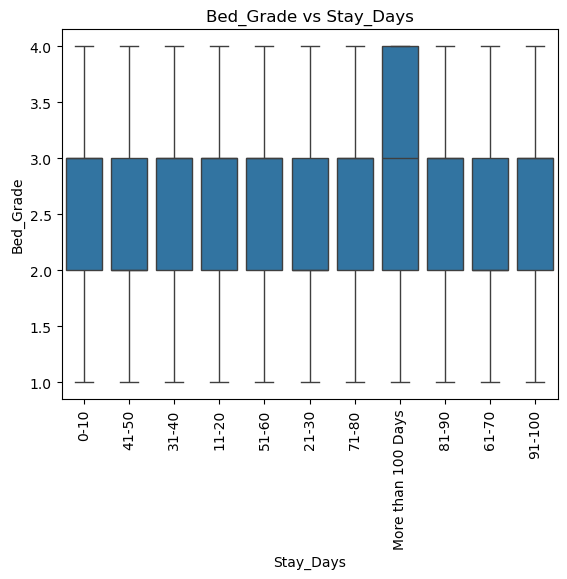

In [14]:
for col in features.select_dtypes(include=['int64', 'float64']).columns:
    sns.boxplot(x='Stay_Days', y=col, data=df)
    plt.title(f"{col} vs Stay_Days")
    plt.xticks(rotation=90)
    plt.show()
#for numerical variables for stay days

We use boxplot for getting the relationship of all numeric variables. For the hospital, hospital type, hospital city, hospital region, and bed grade, not much outliers or anomalies are present, along with uniform range as all these variables are more categorical and should be explored with other tools rather than boxplots. However, available extra rooms in hospital variable shows a lot of outliers, but has a consistent median overall, which hints that it does not drive the length of stay days as much.

In [15]:
features['Hospital'] = features['Hospital'].astype('category')
features['Hospital_type'] = features['Hospital_type'].astype('category')
features['Hospital_city'] = features['Hospital_city'].astype('category')
features['Hospital_region'] = features['Hospital_region'].astype('category')
features['Bed_Grade'] = features['Bed_Grade'].astype('category')
# since we know that these variables are more categorical, we make sure during plotting, these are treated as categorical instead of numeric values

Hospital Heatmap


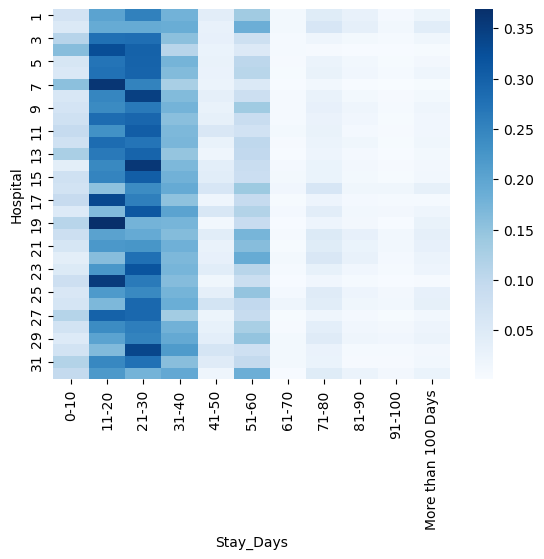

Hospital_type Heatmap


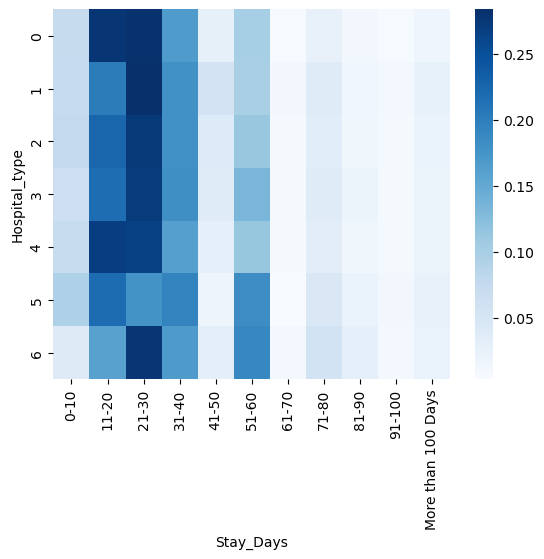

Hospital_city Heatmap


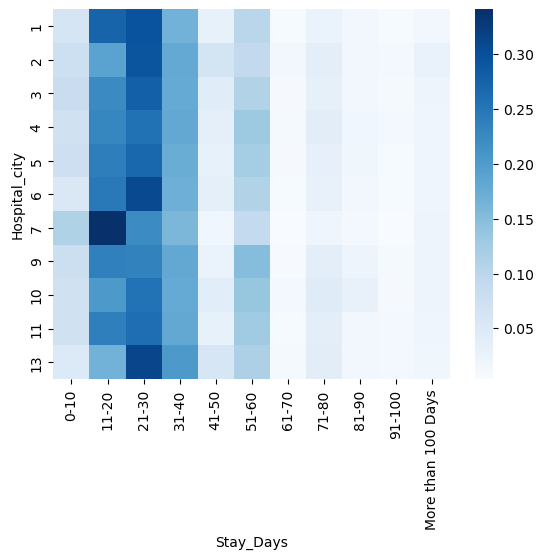

Hospital_region Heatmap


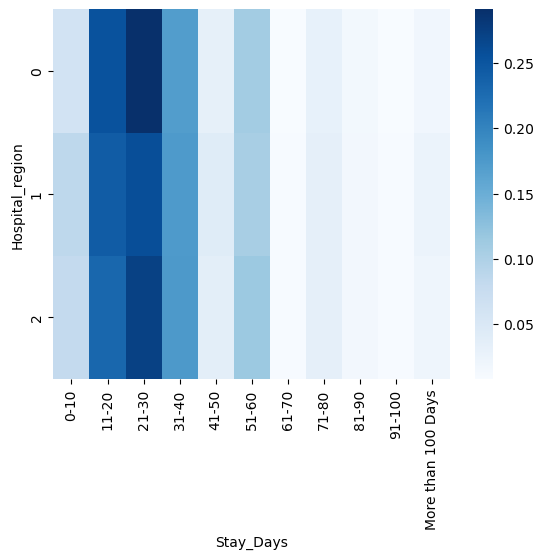

Department Heatmap


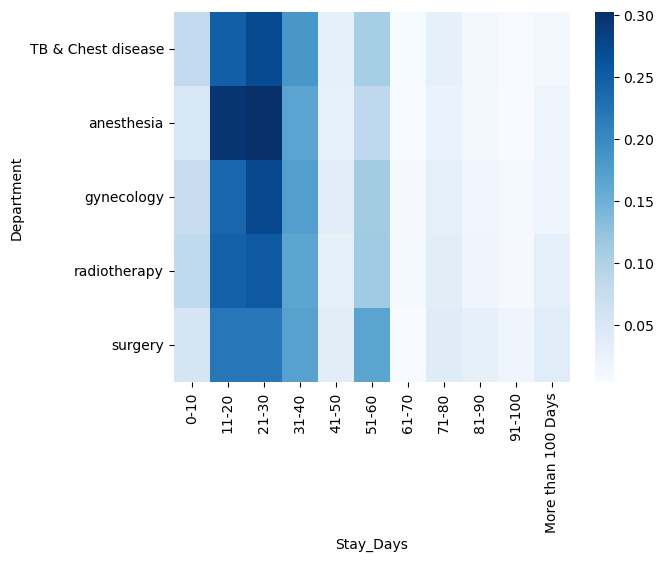

Ward_Type Heatmap


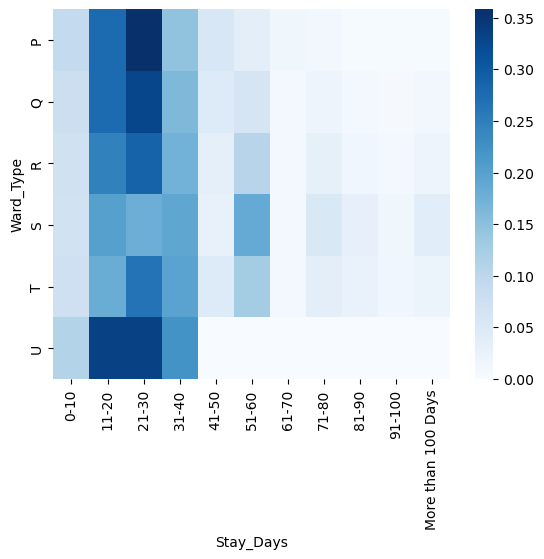

Ward_Facility Heatmap


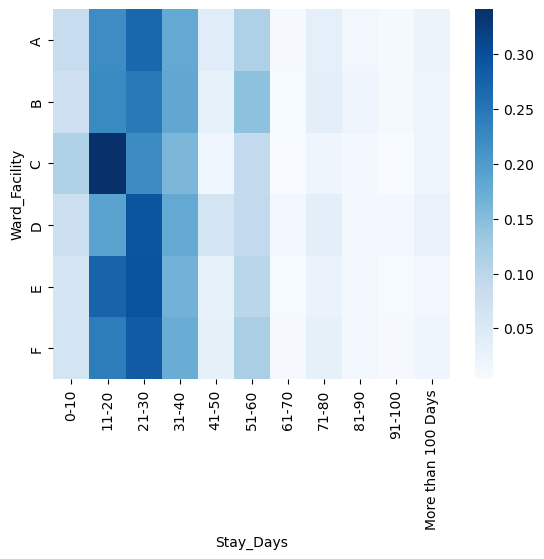

Bed_Grade Heatmap


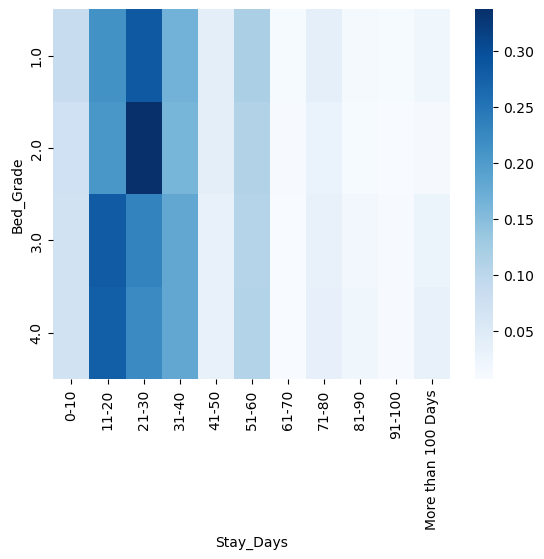

Type of Admission Heatmap


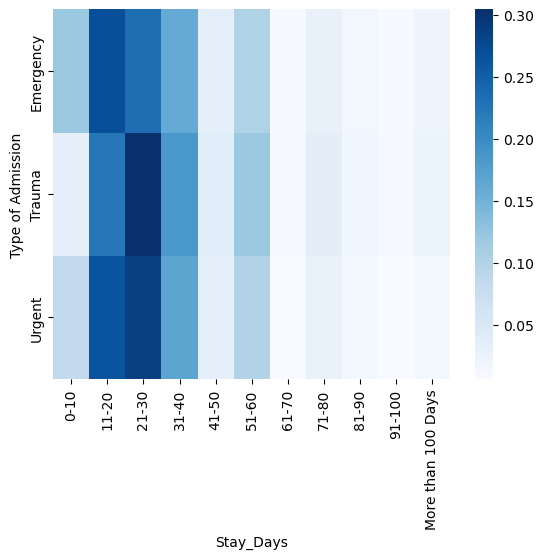

Illness_Severity Heatmap


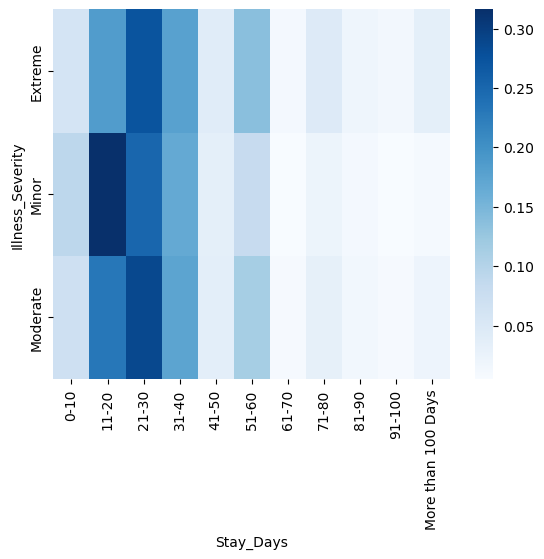

Age Heatmap


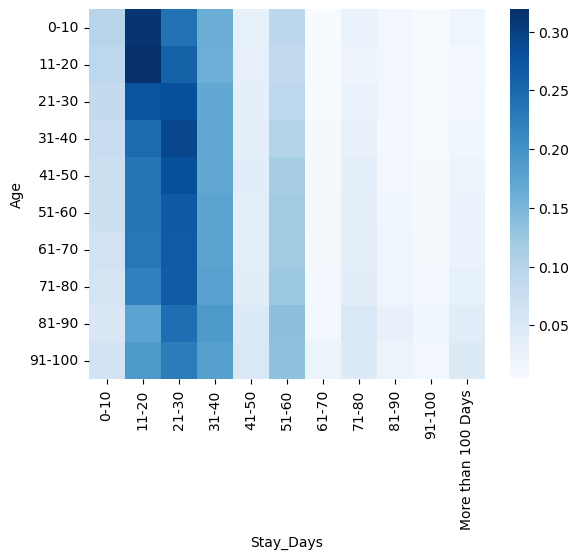

In [28]:
for col in features.select_dtypes(include=['object', 'category']).columns:
    print(f'{col} Heatmap')
    sns.heatmap(pd.crosstab(df[col], df['Stay_Days'], normalize='index'), cmap='Blues')
    plt.show()
    #heatmap comparsion for all features vs stay days

Hospital Heatmap


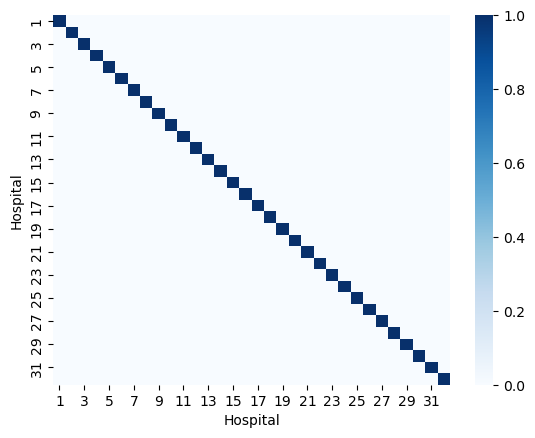

Hospital_type Heatmap


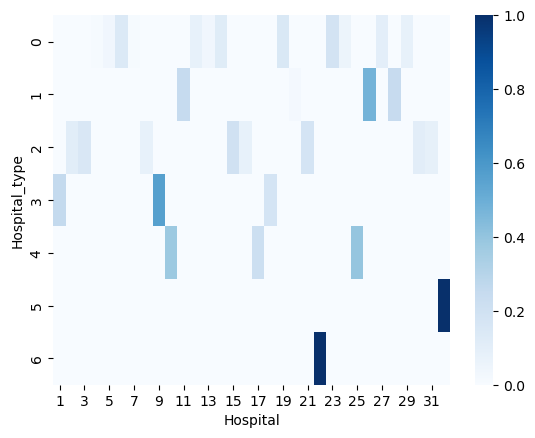

Hospital_city Heatmap


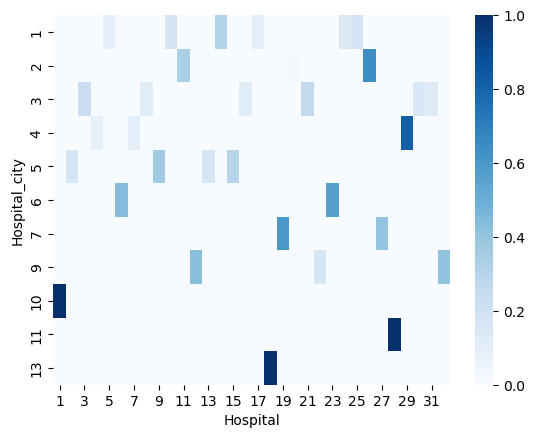

Hospital_region Heatmap


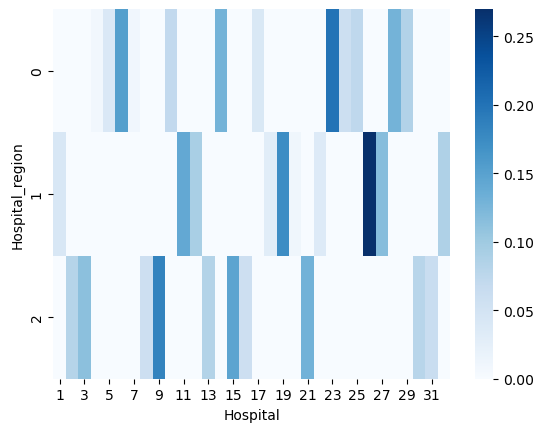

Department Heatmap


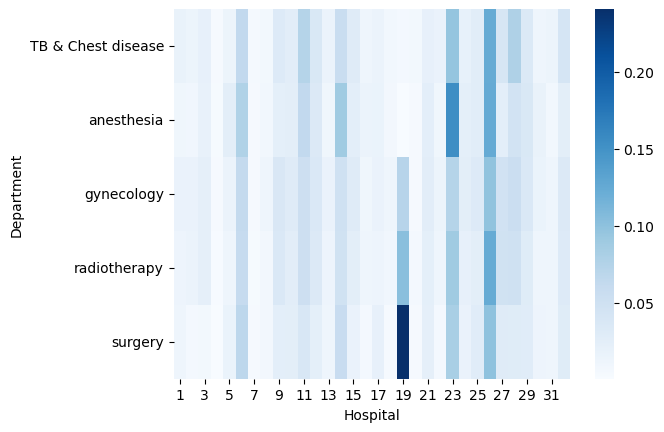

Ward_Type Heatmap


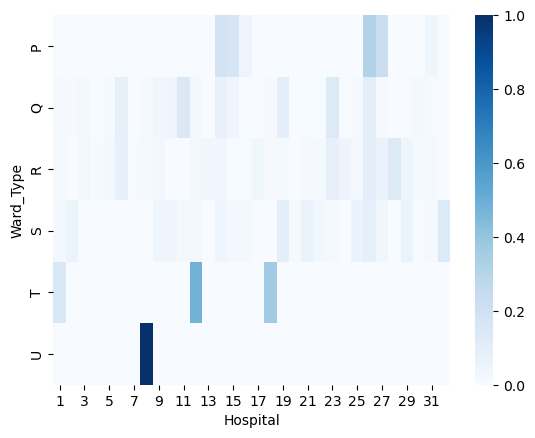

Ward_Facility Heatmap


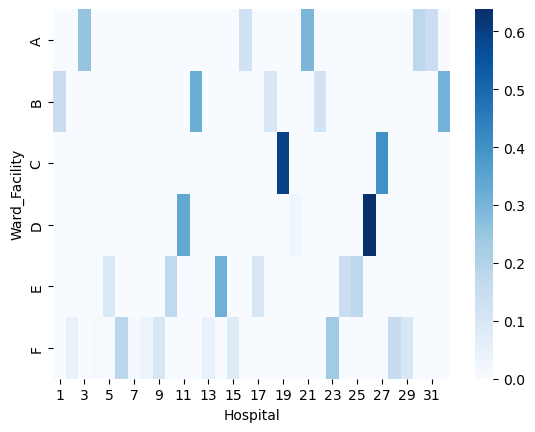

Bed_Grade Heatmap


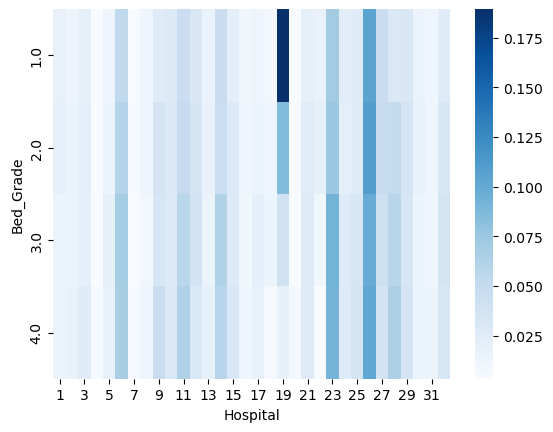

Type of Admission Heatmap


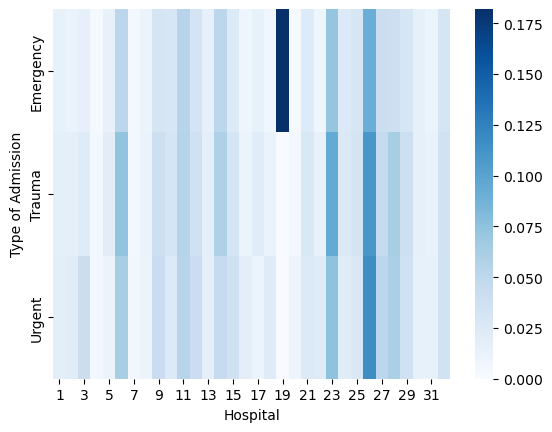

Illness_Severity Heatmap


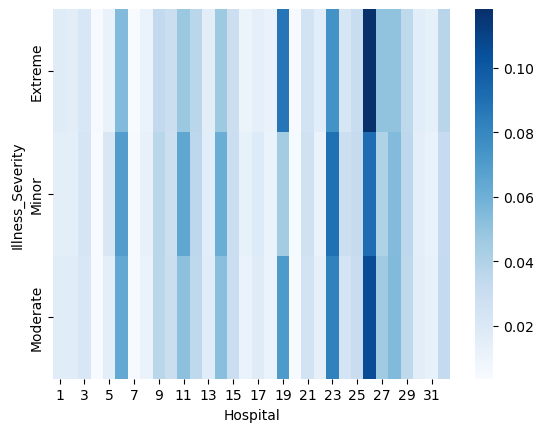

Age Heatmap


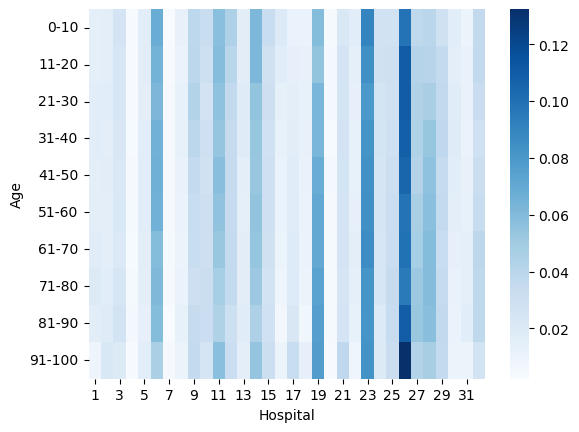

In [29]:
for col in features.select_dtypes(include=['object', 'category']).columns:
    print(f'{col} Heatmap')
    sns.heatmap(pd.crosstab(df[col], df['Hospital'], normalize='index'), cmap='Blues')
    plt.show()
    #heatmap comparsion for all features vs Hospital
    #comparing with Hospital variable because this is where most features are tied back to

# 3. Data Preparation

## 3.1 Data Cleaning

In [17]:
## Clean data

## 3.2 Train-Test Split

In [18]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [19]:
## Initialise and train model


# 5. Model Evaluation

In [20]:
## Evaluate model


In [21]:
## New data

## Predict


## Iterative model development


In [22]:
## Further feature engineering / feature selection